In [ ]:
#data preprocessing steps using ml with python

In [ ]:
import numpy as np
import pandas as pd
df1 = pd.read_csv('/content/Placement (1).csv')
df1.head()

,Student_ID,CGPA,IQ,Placement
0,1,6.8,123,1
1,2,5.9,106,0
2,3,5.3,121,0
3,4,7.4,132,1
4,5,5.8,142,0


In [ ]:
df1.shape

(100, 4)

In [ ]:
df = df1.iloc[:,1:] #1st column is deleted
df.head()

,CGPA,IQ,Placement
0,6.8,123,1
1,5.9,106,0
2,5.3,121,0
3,7.4,132,1
4,5.8,142,0


Text(0, 0.5, 'IQ')

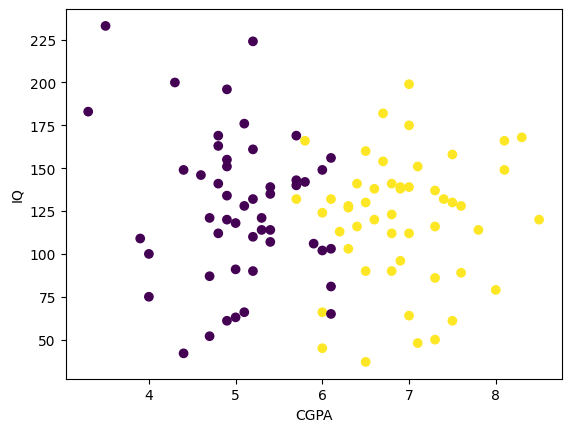

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(df['CGPA'],df['IQ'],c=df['Placement'])
plt.xlabel('CGPA')
plt.ylabel('IQ')

In [ ]:
#extracting input and output variables
df.head()

,CGPA,IQ,Placement
0,6.8,123,1
1,5.9,106,0
2,5.3,121,0
3,7.4,132,1
4,5.8,142,0


In [ ]:
x = df.iloc[:,0:2]
x

,CGPA,IQ
0,6.8,123
1,5.9,106
2,5.3,121
3,7.4,132
4,5.8,142
...,...,...
95,4.3,200
96,4.4,42
97,6.7,182
98,6.3,103


In [ ]:
y = df.iloc[:,-1] #display the last column
y

,Placement
0,1
1,0
2,0
3,1
4,0
...,...
95,0
96,0
97,1
98,1


In [ ]:
#train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,random_state=1)
x_train

,CGPA,IQ
92,5.2,110
39,4.6,146
56,6.1,65
52,7.0,175
51,4.8,141
...,...,...
75,4.8,169
9,5.1,66
72,7.3,116
12,5.4,139


In [ ]:
x_test

,CGPA,IQ
80,4.9,196
84,5.7,169
33,6.0,149
81,5.4,107
93,6.8,112
17,3.3,183
36,5.7,140
82,6.5,37
69,8.5,120
65,8.1,166


In [ ]:
y_train

,Placement
92,0
39,0
56,0
52,1
51,0
...,...
75,0
9,0
72,1
12,0


In [ ]:
y_test

,Placement
80,0
84,0
33,0
81,0
93,1
17,0
36,0
82,1
69,1
65,1


In [ ]:
#scaling the values
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_train

array([[-0.70920814, -0.30811838],
       [-1.25475287,  0.61709344],
       [ 0.10910895, -1.46463316],
       [ 0.92742603,  1.36240297],
       [-1.07290463,  0.4885918 ],
       [ 0.92742603,  0.43719114],
       [-1.89122172, -0.33381871],
       [ 1.38204664, -1.56743448],
       [ 0.10910895, -1.05342791],
       [ 0.01818482, -1.97863973],
       [-0.61828402, -0.02541477],
       [-0.98198051, -1.56743448],
       [ 0.65465367,  1.54230527],
       [ 0.01818482, -0.51372101],
       [-0.70920814,  0.25728884],
       [ 0.74557779, -0.82212495],
       [-1.16382875, -1.79873743],
       [ 0.01818482,  0.05168622],
       [-0.61828402, -0.20531707],
       [ 0.47280543,  0.97689804],
       [-0.89105639, -0.10251575],
       [ 0.20003307, -0.2310174 ],
       [ 0.38188131,  0.4885918 ],
       [-1.52752523,  2.00491118],
       [-1.43660111,  0.69419443],
       [-0.98198051,  0.3086895 ],
       [ 0.56372955,  0.41149081],
       [-1.07290463, -0.25671773],
       [-1.16382875,

In [ ]:
x_test = scaler.transform(x_test)
x_test

array([[-0.98198051,  1.90210986],
       [-0.25458754,  1.208201  ],
       [ 0.01818482,  0.69419443],
       [-0.5273599 , -0.38521937],
       [ 0.74557779, -0.25671773],
       [-2.43676644,  1.5680056 ],
       [-0.25458754,  0.46289147],
       [ 0.47280543, -2.18424236],
       [ 2.29128785, -0.0511151 ],
       [ 1.92759136,  1.13110001]])

In [ ]:
#using ml algorithm
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
#model training
lg.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_pred = lg.predict(x_test)
y_pred

array([0, 0, 1, 0, 1, 0, 0, 1, 1, 1])

In [ ]:
y_test

,Placement
80,0
84,0
33,0
81,0
93,1
17,0
36,0
82,1
69,1
65,1


In [ ]:
#check model performance
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.9

<Axes: >

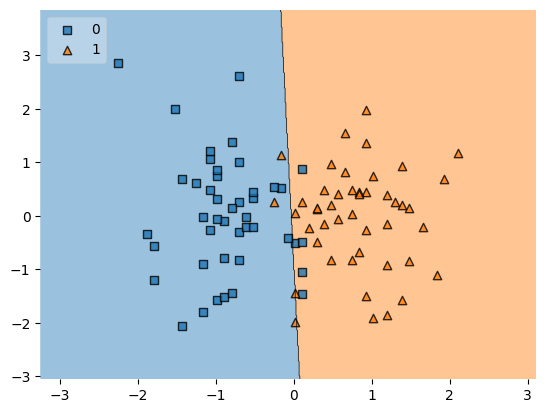

In [ ]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x_train,y_train.values,clf=lg,legend=2)

In [ ]:
#deployment
import pickle
with open('model.pkl', 'wb') as f:
    pickle.dump(lg, f)
print("Model saved successfully")

Model saved successfully
